In [1]:
import sys
import time
sys.path.insert(0, './')

from cbs import PBS

from environment import Environment, Location, Agent, Agent_Task
from controller import Shelf_Place, Parking_Place, Station, Order, Controller
import generator
import visualize

In [2]:
# setup simulation data
order_num = 1000
agent_num = 4
pile_num = 2

map_obstacle_list, station_list, shelf_list, parking_list, agent_list, order_list = generator.get_default_test_data_kiva(order_num = order_num, agent_num = agent_num, pile_num = pile_num)


In [3]:
# setup a simulation environment
window_size = 20
buffer_size = 5
time_step_per_planning = 3
total_run_time = 1000

shelf_rate = 0.8

env = Environment(window_size= window_size, buffer_size= buffer_size, time_step_per_planning= time_step_per_planning, total_run_time= total_run_time)

location_data_for_plot, cal_time_cost_data, total_finished_task_data, task_time_cost_data = visualize.run(env, map_obstacle_list, station_list, shelf_list, parking_list, agent_list, order_list, shelf_rate = shelf_rate, priority_by_order_time = True, check_troubles = True, trouble_may_happen = False)

solution found
time step 0: 0.0718080997467041
solution found
time step 3: 0.028022050857543945
solution found
time step 6: 0.011673927307128906
solution found
time step 9: 0.05500316619873047
solution found
time step 12: 0.004075050354003906
solution found
time step 15: 0.012725830078125
solution found
time step 18: 0.14606094360351562
solution found
time step 21: 0.22478699684143066
solution found
time step 24: 0.3484170436859131
solution found
time step 27: 0.20907807350158691
solution found
time step 30: 0.12506914138793945
solution found
time step 33: 0.13021612167358398
solution found
time step 36: 0.056108713150024414
solution found
time step 39: 0.32877373695373535
solution found
time step 42: 0.4100639820098877
solution found
time step 45: 0.3265669345855713
solution found
time step 48: 0.13954925537109375
solution found
time step 51: 0.015251874923706055
solution found
time step 54: 0.01345515251159668
solution found
time step 57: 0.003880739212036133
solution found
time step

solution found
time step 498: 0.005324840545654297
solution found
time step 501: 0.003097057342529297
solution found
time step 504: 0.004290103912353516
solution found
time step 507: 0.0030226707458496094
solution found
time step 510: 0.0014238357543945312
solution found
time step 513: 0.0002570152282714844
solution found
time step 516: 0.00024819374084472656
solution found
time step 519: 0.015604972839355469
solution found
time step 522: 0.0018482208251953125
solution found
time step 525: 0.0006201267242431641
solution found
time step 528: 0.00029206275939941406
solution found
time step 531: 0.0002999305725097656
solution found
time step 534: 0.002028942108154297
solution found
time step 537: 0.0008940696716308594
solution found
time step 540: 0.0032367706298828125
solution found
time step 543: 0.0008182525634765625
solution found
time step 546: 0.0003833770751953125
solution found
time step 549: 0.005408048629760742
solution found
time step 552: 0.0015339851379394531
solution found
t

solution found
time step 987: 0.2187058925628662
solution found
time step 990: 0.003804922103881836
solution found
time step 993: 0.005896091461181641
solution found
time step 996: 0.0028200149536132812
solution found
time step 999: 0.060102224349975586


In [13]:
%matplotlib notebook

animation = visualize.visualize(env, location_data_for_plot[0:100], 500)

# calculate total time the MAPF algorithm cost. (without other instruction like task-assignment and constraint-settings...)
visualize.time_use(cal_time_cost_data)

<IPython.core.display.Javascript object>

used time: 17.45363140106201s


<IPython.core.display.Javascript object>


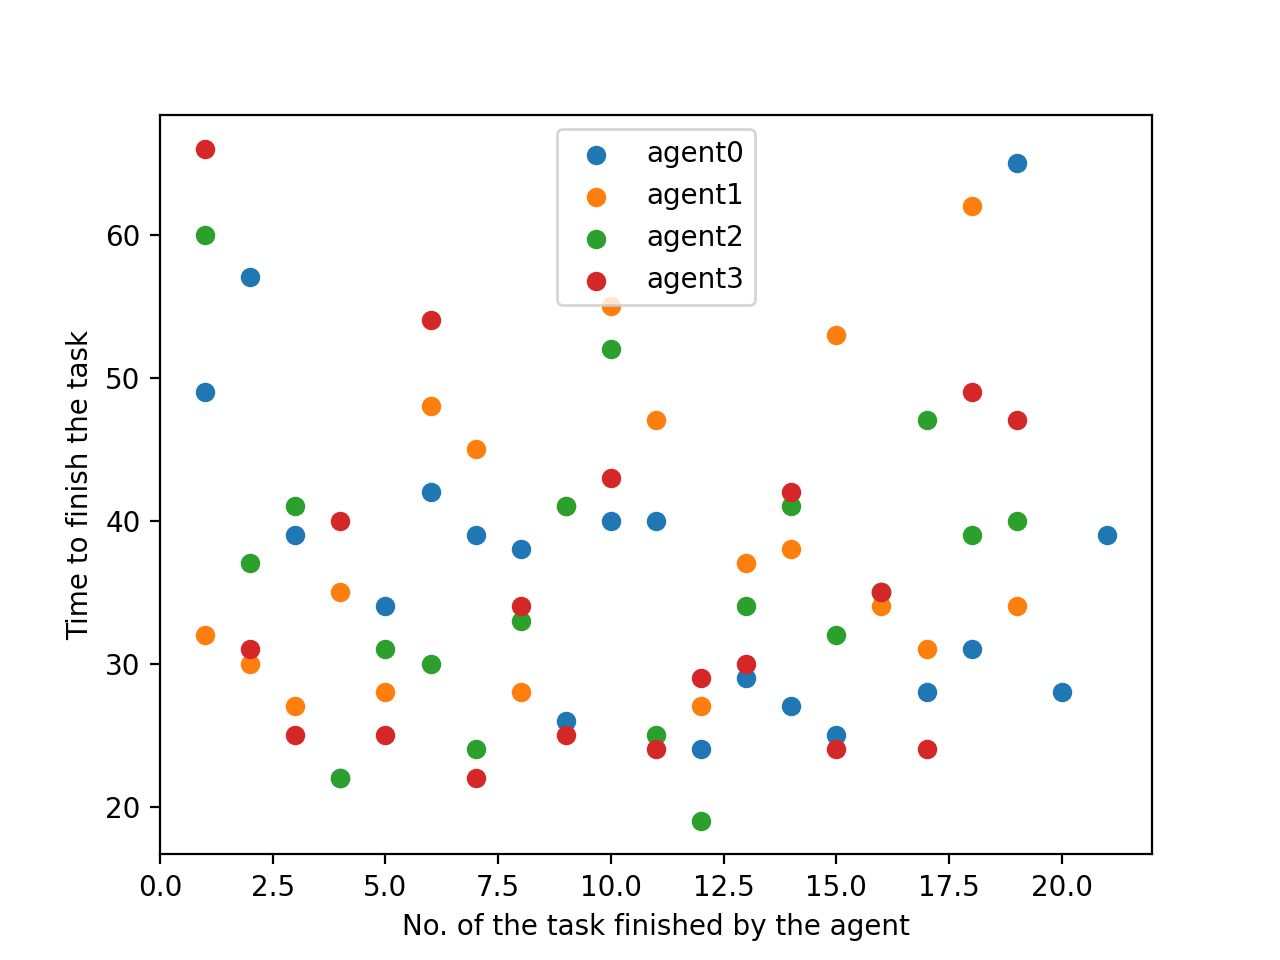

agent0 36.04761904761905
agent1 38.526315789473685
agent2 35.94736842105263
agent3 35.21052631578947
Total finished tasks: 78 in 1002 s


In [14]:
def avg(list):
    temp = 0
    for i in list:
        temp += i
    return temp / len(list)

%matplotlib notebook
import matplotlib.pyplot as plt

for agent, logs in task_time_cost_data.items():
    data_x = list(range(1, len(logs)+1))
    plt.scatter(data_x, logs, label=agent)
    print(agent, avg(logs))
    
plt.xlabel("No. of the task finished by the agent")
plt.ylabel("Time to finish the task")

plt.legend()
print("Total finished tasks:", total_finished_task_data[-1], "in", len(total_finished_task_data)* time_step_per_planning, "s")

In [15]:
# save video as gif.
animation.save("sim_pbs_kiva.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [16]:
def data_count_name(a, p, comment):
    info_string = str(a) + "_" + str(p) + "_" + comment
    return "total_finished_task_data_" + info_string

def data_time_name(a, p, comment):
    info_string = str(a) + "_" + str(p) + "_" + comment
    return "cal_time_cost_data_" + info_string

def data_task_name(w, b, t):
    info_string = str(a) + "_" + str(p) + "_" + comment
    return "task_time_cost_data_" + info_string

def data_label_name(a, p):
    return str(a) + " agents " + str(p) + " piles"

In [17]:
import json
import os

def save_data(data_name, cal_time_cost_data, total_finished_task_data, task_time_cost_data, agent_num, pile_num, comment = ""):
    
    if not os.path.exists(data_name + ".json"):
        f = open(data_name + ".json", 'a+')
        f.write("{}")
        
    with open(data_name + ".json") as f:
        data = json.load(f)
    
    if comment:
        info_string = str(len(agent_list)) + "_" + str(len(parking_list)) + "_" + comment
        key_1 = "cal_time_cost_data_" + info_string
        key_2 = "total_finished_task_data_" + info_string
        key_3 = "task_time_cost_data_" + info_string
    else:
        count = 0
        
        info_string = str(len(agent_list)) + "_" + str(len(parking_list)) + "_" + str(count)
        key_1 = "cal_time_cost_data_" + info_string
        
        while(key_1 in data.keys()):
            count += 1
            info_string = str(len(agent_list)) + "_" + str(len(parking_list)) + "_" + str(count)
            key_1 = "cal_time_cost_data_" + info_string
            
        key_2 = "total_finished_task_data_" + info_string
        key_3 = "task_time_cost_data_" + info_string
    
    data.update({key_1: cal_time_cost_data, key_2: total_finished_task_data, key_3: task_time_cost_data})

    with open(data_name + ".json", 'w') as f:
        json.dump(data, f)
        
def read_data(data_name):
    if not os.path.exists(data_name + ".json"):
        f = open(data_name + ".json", 'a+')
        f.write("{}")
        
    with open(data_name + ".json") as f:
        data = json.load(f)
            
    return data

In [18]:
save_data("data", cal_time_cost_data, total_finished_task_data, task_time_cost_data, len(agent_list), len(parking_list), comment = "")

In [20]:
with open("data" + ".json") as f:
    data = json.load(f)
list(data.keys())

['cal_time_cost_data_16_8_0',
 'total_finished_task_data_16_8_0',
 'task_time_cost_data_16_8_0',
 'cal_time_cost_data_12_6_0',
 'total_finished_task_data_12_6_0',
 'task_time_cost_data_12_6_0',
 'cal_time_cost_data_8_4_0',
 'total_finished_task_data_8_4_0',
 'task_time_cost_data_8_4_0',
 'cal_time_cost_data_4_2_0',
 'total_finished_task_data_4_2_0',
 'task_time_cost_data_4_2_0',
 'cal_time_cost_data_16_8_1',
 'total_finished_task_data_16_8_1',
 'task_time_cost_data_16_8_1',
 'cal_time_cost_data_12_6_1',
 'total_finished_task_data_12_6_1',
 'task_time_cost_data_12_6_1',
 'cal_time_cost_data_8_4_1',
 'total_finished_task_data_8_4_1',
 'task_time_cost_data_8_4_1',
 'cal_time_cost_data_4_2_1',
 'total_finished_task_data_4_2_1',
 'task_time_cost_data_4_2_1',
 'cal_time_cost_data_12_8_0',
 'total_finished_task_data_12_8_0',
 'task_time_cost_data_12_8_0',
 'cal_time_cost_data_12_6_2',
 'total_finished_task_data_12_6_2',
 'task_time_cost_data_12_6_2',
 'cal_time_cost_data_12_6_3',
 'total_fini

In [21]:
data = read_data("data")

<IPython.core.display.Javascript object>


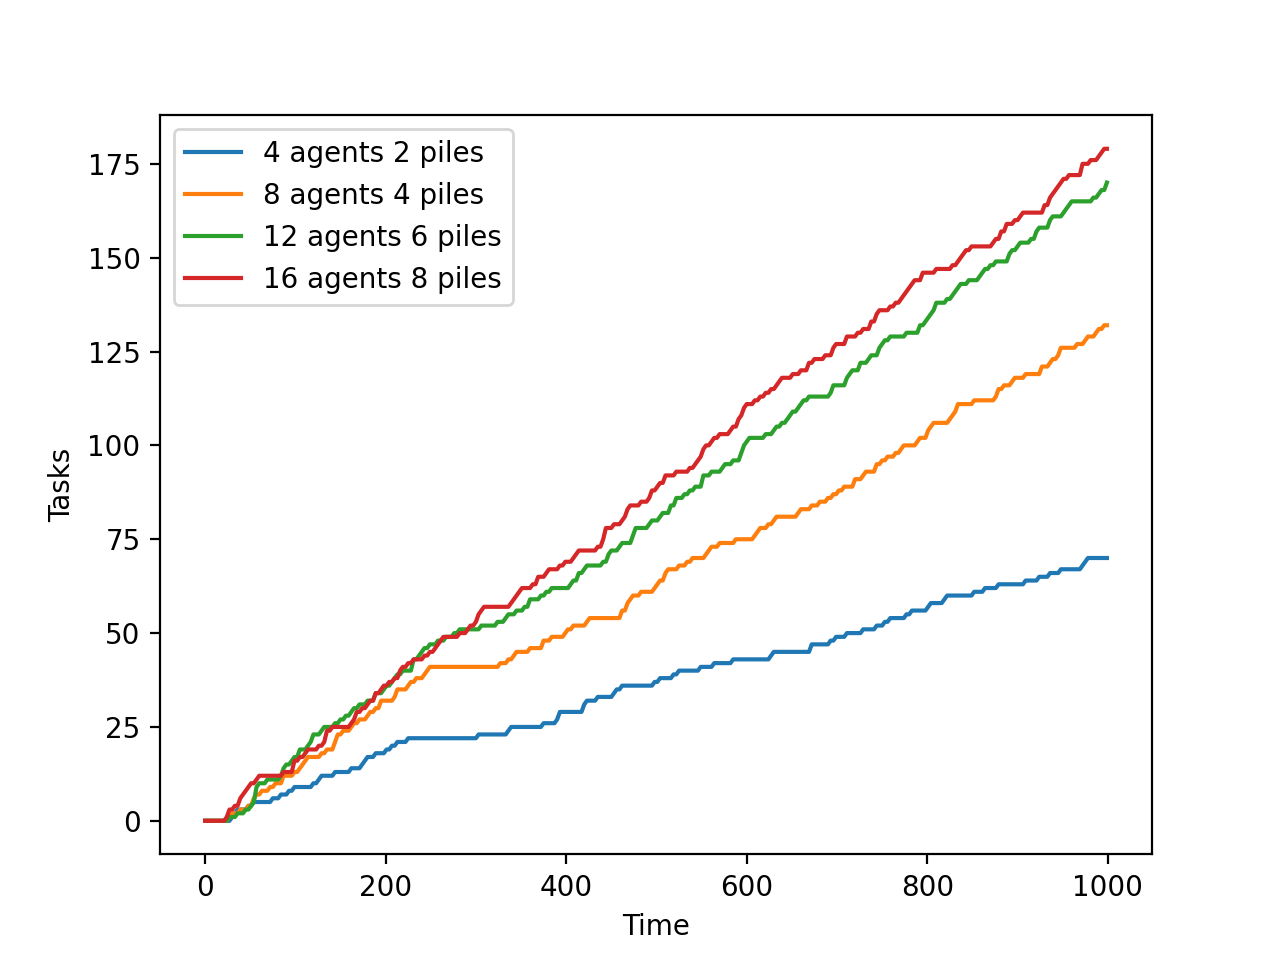

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

data_num = len(data[data_count_name(16, 8, "0")])
time_span = time_step_per_planning 

data_x = []
for i in range(0, data_num):
    data_x.append(i*3)

# constant priority, small number agents have higher priority
# plt.plot(data_x, data[data_count_name(4, 2, "0")], label=data_label_name(4, 2))
# plt.plot(data_x, data[data_count_name(8, 4, "0")], label=data_label_name(8, 4))
# plt.plot(data_x, data[data_count_name(12, 6, "0")], label=data_label_name(12, 6))
# plt.plot(data_x, data[data_count_name(16, 8, "0")], label=data_label_name(16, 8))

#priority by the time when getting the task
plt.plot(data_x, data[data_count_name(4, 2, "1")], label=data_label_name(4, 2))
plt.plot(data_x, data[data_count_name(8, 4, "1")], label=data_label_name(8, 4))
plt.plot(data_x, data[data_count_name(12, 6, "3")], label=data_label_name(12, 6))
plt.plot(data_x, data[data_count_name(16, 8, "1")], label=data_label_name(16, 8))

plt.xlabel("Time")
plt.ylabel("Tasks")
plt.legend()
plt.show()

334


<IPython.core.display.Javascript object>


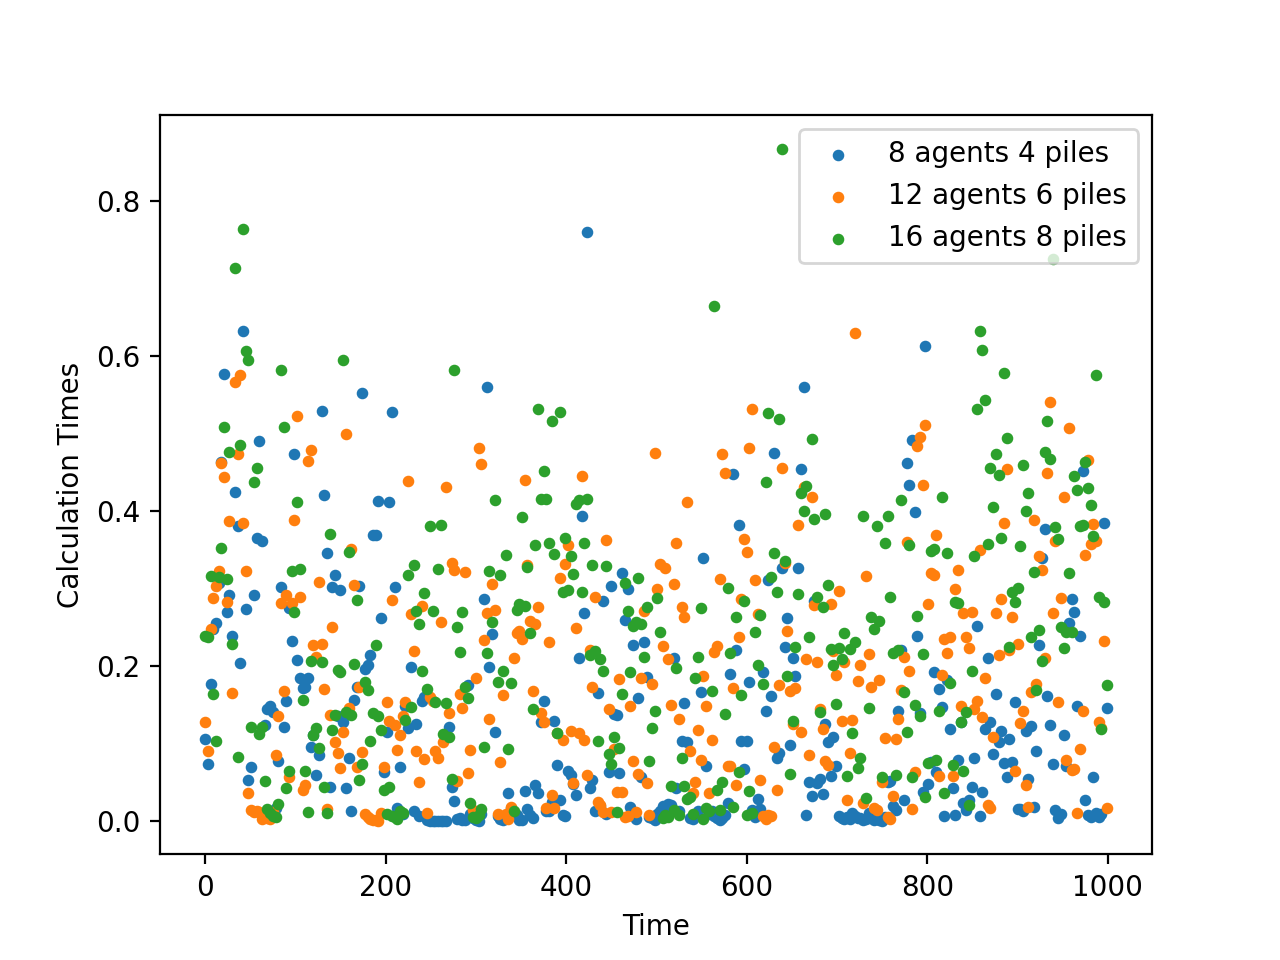

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt

data_num = len(data[data_count_name(16, 8, "0")])
print(data_num)
time_span = time_step_per_planning 

data_x = []
for i in range(0, data_num):
    data_x.append(i*3)

plt.scatter(data_x, data[data_time_name(8, 4, "0")], label=data_label_name(8, 4),s=10)
plt.scatter(data_x, data[data_time_name(12, 6, "0")], label=data_label_name(12, 6),s=10)
plt.scatter(data_x, data[data_time_name(16, 8, "0")], label=data_label_name(16, 8),s=10)
plt.xlabel("Time")
plt.ylabel("Calculation Times")
plt.legend()
plt.show()

In [165]:
# backup data for different map test
order_list_backup2 = order_list_backup